# TP2 : Transmission sur fréquence porteuse QSPK

## Import des librairies et des modules

In [165]:
import importlib
import matplotlib.pyplot as plt
import numpy as np

In [214]:
import commNumEJ; from commNumEJ import Source
importlib.reload(commNumEJ)

<module 'commNumEJ' from 'c:\\Users\\admin\\Desktop\\Modulation_numérique(5) - Copie\\TP2\\pythonEJ-2\\pythonEJ\\commNumEJ.py'>

In [200]:
import commNumEJ; from commNumEJ import Modem
importlib.reload(commNumEJ)

<module 'commNumEJ' from 'c:\\Users\\admin\\Desktop\\Modulation_numérique(5) - Copie\\TP2\\pythonEJ-2\\pythonEJ\\commNumEJ.py'>

In [209]:
import commNumEJ; from commNumEJ import Mesures
importlib.reload(commNumEJ)

<module 'commNumEJ' from 'c:\\Users\\admin\\Desktop\\Modulation_numérique(5) - Copie\\TP2\\pythonEJ-2\\pythonEJ\\commNumEJ.py'>

In [235]:
import commNumEJ; from commNumEJ import Canal
importlib.reload(commNumEJ)

<module 'commNumEJ' from 'c:\\Users\\admin\\Desktop\\Modulation_numérique(5) - Copie\\TP2\\pythonEJ-2\\pythonEJ\\commNumEJ.py'>

In [224]:
import commNumEJ; from commNumEJ import PLT
importlib.reload(commNumEJ)

<module 'commNumEJ' from 'c:\\Users\\admin\\Desktop\\Modulation_numérique(5) - Copie\\TP2\\pythonEJ-2\\pythonEJ\\commNumEJ.py'>

In [171]:
from scapy.all import *

## Aide avec la classe Modem

In [172]:
help(Modem.mapping)

Help on function mapping in module commNumEJ:

mapping(self, amplitude, phase_ori=0.7853981633974483)
    Fonction en charge d'effectue le mapping entre les symboles numériques et les symboles de modulation
    
    Parametres
    ----------
    amplitude : amplitude maximale des symboles de modulation pour une modulation PAM ou ASK,
                amplitude max de la sinusoide pour une modulation PSK et amplitude max de I
                et Q pour une modulation QAM
    phase_ori : utilisé seulement pour la modulation QPSK, phase à l'origine du premier
                symbole (par défaut = pi/4)
    
    Retourne
    -------
    mapping_table : la table de mapping sous forme d'un dictionnaire



## 1-Classe Source

#### Méthode "random"

La méthode "random" permet de générer des données binaires aléatoire avec une probabilité de 0.5 d'avoir un 0 ou un 1. Cette méthode prend en entrée le nombre de bits désiré et retourner le vecteur avec la séquence binaire sous la forme d'un array numpy

In [176]:
test_bits= Source.random(20)

[0 0 0 0 0 1 0 1 1 1 0 1 1 1 1 1 0 0 1 0]


### Méthode "icmp"

La méthode "icmp" permet de créer un paquet icmp avec scapy et donner la séquence binaire correspondante

In [177]:

test_icmp=Source.ICMP('00:01:02:03:04:05','06:07:08:09:0A:0B','192.168.10.1','192.168.10.2','request')

les données associées à la trame au format hexadécimal sont :
 Ether / IP / ICMP 192.168.10.2 > 192.168.10.1 echo-request 0
mais c' est un objet de type Scapy : <class 'scapy.layers.l2.Ether'>.On peut le convertir en un objet de types bytes : <class 'bytes'>

En convertissant l objet bytes en une liste, on obtient une liste d entier : 
 [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 8, 0, 69, 0, 0, 28, 0, 1, 0, 0, 64, 1, 229, 140, 192, 168, 10, 2, 192, 168, 10, 1, 8, 0, 247, 255, 0, 0, 0, 0]
 et maintenant sous, la forme d'un array numpy : 
 [  0   1   2   3   4   5   6   7   8   9  10  11   8   0  69   0   0  28
   0   1   0   0  64   1 229 140 192 168  10   2 192 168  10   1   8   0
 247 255   0   0   0   0]

 les données associées à la trame au format binaire dans une liste de str : 
 ['0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0', '0', '0', '0', '0', '0', '1', '0', '0', '0', '0', '0', '0', '0', '1', '1', '0', '0', '0', '0', '0', '1', '0', '0', '0', '0'

## 2-Emetteur PAM4

On souhaite créer un émetteur PAM4 avec 20 symboles aléatoires, un niveau max de +3/-3 et afficher la valeur des bits, les symboles numériques et les symboles de modulations

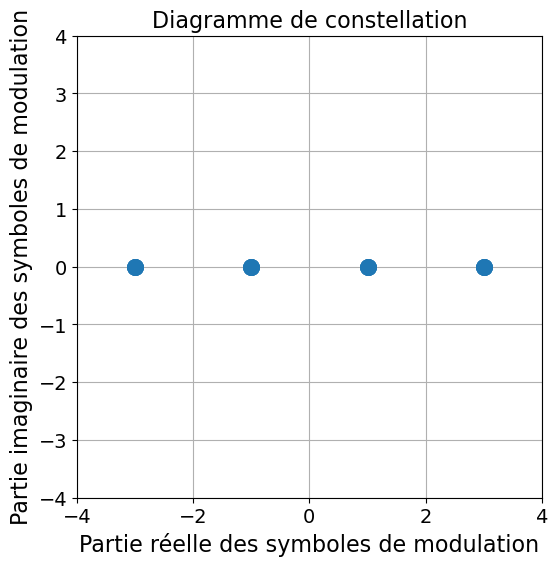

In [178]:
# instanciation de la classe Modem
pam4 = Modem('PAM', 4, np.random.binomial(1, 0.5, 40))

# Création des symboles PAM4
symbs_mod = pam4.mapping(3)

# Affichage du diagramme de constellation
Mesures.diagramme_constellation(symbs_mod)

On souhaite maintenant créer une nouvelle fonction pour le filtre de mise en forme

[-1. -1. -1. -1. -1. -1. -1. -1.  3.  3.  3.  3.  3.  3.  3.  3. -1. -1.
 -1. -1. -1. -1. -1. -1.  1.  1.  1.  1.  1.  1.  1.  1. -1. -1. -1. -1.
 -1. -1. -1. -1.  1.  1.  1.  1.  1.  1.  1.  1. -1. -1. -1. -1. -1. -1.
 -1. -1.  1.  1.  1.  1.  1.  1.  1.  1.  3.  3.  3.  3.  3.  3.  3.  3.
 -3. -3. -3. -3. -3. -3. -3. -3. -3. -3. -3. -3. -3. -3. -3. -3.  1.  1.
  1.  1.  1.  1.  1.  1. -3. -3. -3. -3. -3. -3. -3. -3.  1.  1.  1.  1.
  1.  1.  1.  1. -1. -1. -1. -1. -1. -1. -1. -1.  3.  3.  3.  3.  3.  3.
  3.  3. -3. -3. -3. -3. -3. -3. -3. -3.  3.  3.  3.  3.  3.  3.  3.  3.
 -3. -3. -3. -3. -3. -3. -3. -3.  3.  3.  3.  3.  3.  3.  3.  3.]
160


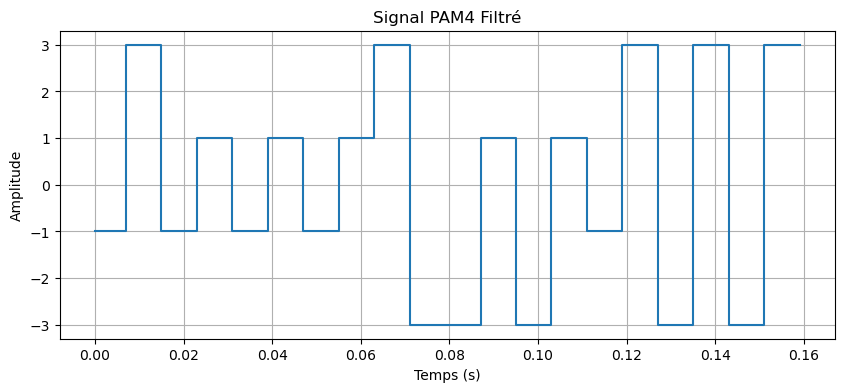

In [179]:
NbEchParSymb = 8
filtreRec = pam4.filtre_MF(symbs_mod, NbEchParSymb, type='rectangular')
print(filtreRec)

te = 1e-3
fe = 1 / te

temps = np.arange(0, len(filtreRec) * te, te)
print(len(filtreRec))

graph = PLT(filtreRec).show((10, 4), temps, filtreRec, 'steps-pre', 'Signal PAM4 Filtre', 'Temps (s)', 'Amplitude')



## 3-Canal AWGN


Un canal AWGN (Additive White Gaussian Noise) est un modèle couramment utilisé en télécommunications pour représenter la transmission de signaux dans un environnement bruité. Ce modèle est utile pour étudier et simuler la performance des systèmes de communication.


### 1. Additive :

Le bruit dans un canal AWGN est additif, ce qui signifie qu'il s'ajoute au signal transmis sans interférer avec le contenu du signal lui-même. En termes simples, le bruit n'altère pas les propriétés fondamentales du signal mais se superpose simplement à celui-ci.
### 2. White :

Le bruit est qualifié de blanc parce qu'il a un spectre plat sur toutes les fréquences. Cela signifie que le bruit affecte toutes les fréquences de manière égale, sans privilégier certaines bandes de fréquence.
### 3. Gaussian :

Le bruit suit une distribution gaussienne (ou normale) en termes d'amplitude, c'est-à-dire qu'il est distribué statistiquement comme une courbe en cloche avec une moyenne de zéro. La plupart des valeurs de bruit sont proches de la moyenne, avec quelques valeurs extrêmes dans les deux directions (positives et négatives).
### 4. Noise (Bruit) :

Le bruit est une interférence aléatoire qui dégrade la qualité du signal pendant la transmission. Dans un canal AWGN, le bruit est modélisé comme une perturbation continue et aléatoire qui affecte toutes les parties du signal.

In [236]:
signal_bruite = Canal.awgn(filtreRec, 0, 0.2)


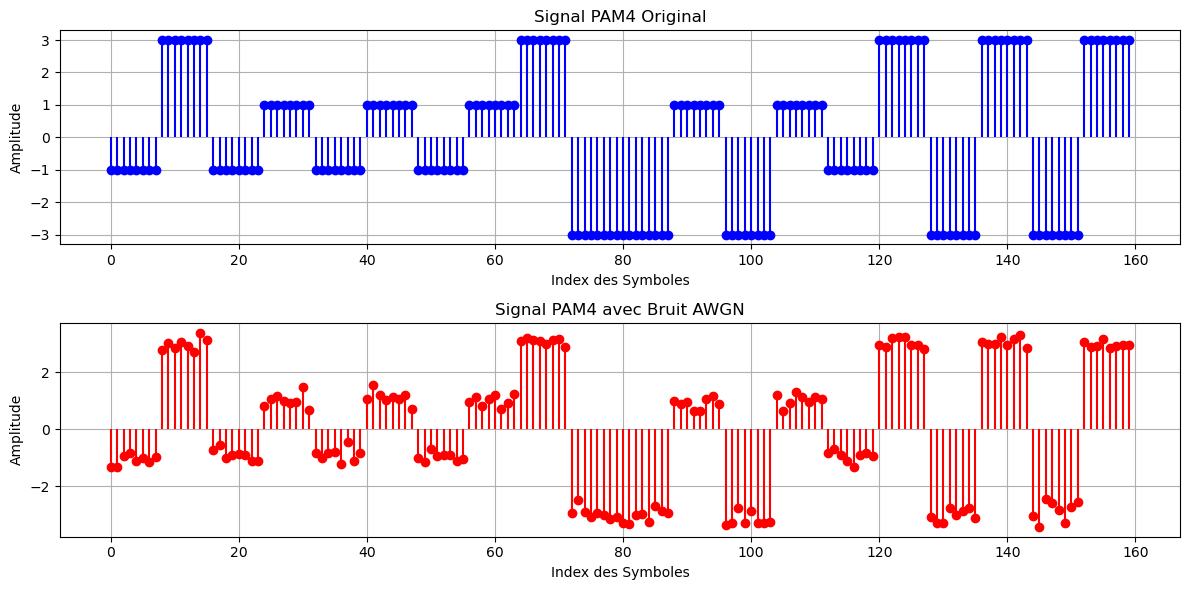

In [237]:
te = 1e-3
ts = te * NbEchParSymb

t1 = np.arange(0, len(symbs_mod)*ts, ts)
t2 = np.arange(0, len(filtreRec)*te, te)

# Affichage
plt.figure(figsize=(12, 6))

# Signal original
plt.subplot(2, 1, 1)
plt.stem(range(160), filtreRec, linefmt='b-', markerfmt='bo', basefmt=' ')
plt.title('Signal PAM4 Original')
plt.xlabel('Index des Symboles')
plt.ylabel('Amplitude')
plt.grid()

# Signal bruité
plt.subplot(2, 1, 2)
plt.stem(range(160), signal_bruite, linefmt='r-', markerfmt='ro', basefmt=' ')
plt.title('Signal PAM4 avec Bruit AWGN')
plt.xlabel('Index des Symboles')
plt.ylabel('Amplitude')
plt.grid()

plt.tight_layout()
plt.show()

## Récepteur PAM4

ici, on va effectuer le downsampling de notre signal PAM4 bruité et l'afficher sous forme graphique 

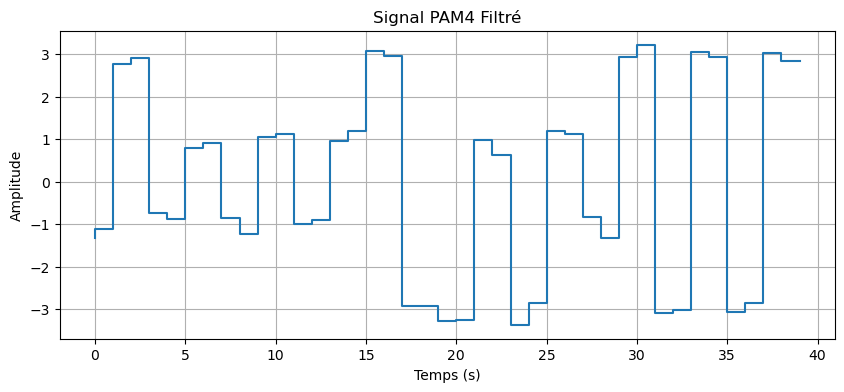

In [250]:

downsample = pam4.downsample(signal_bruite, 4)
graphDOWNSAMPLE = PLT(downsample).show((10, 4), np.arange(0,40,1), downsample, 'steps-pre', 'Signal PAM4 Filtre', 'Temps (s)', 'Amplitude')

Ici, on va vérifier les symboles détecté et les symboles émis

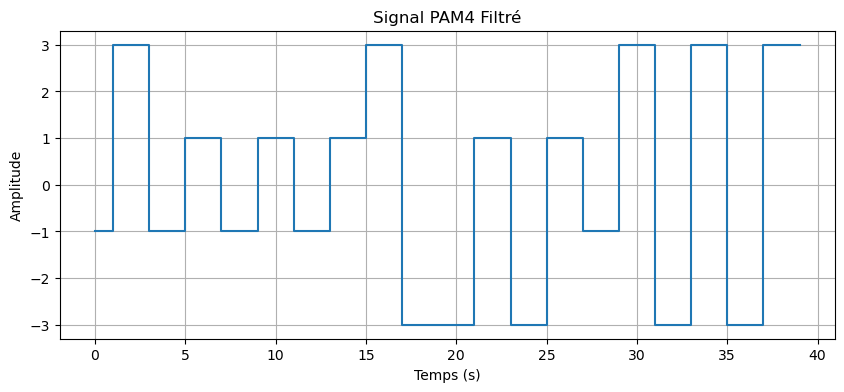

In [251]:
detect = pam4.detection(downsample)
detectGRAPH = PLT(detect).show((10, 4), np.arange(0,40,1), detect, 'steps-pre', 'Signal PAM4 Filtre', 'Temps (s)', 'Amplitude')

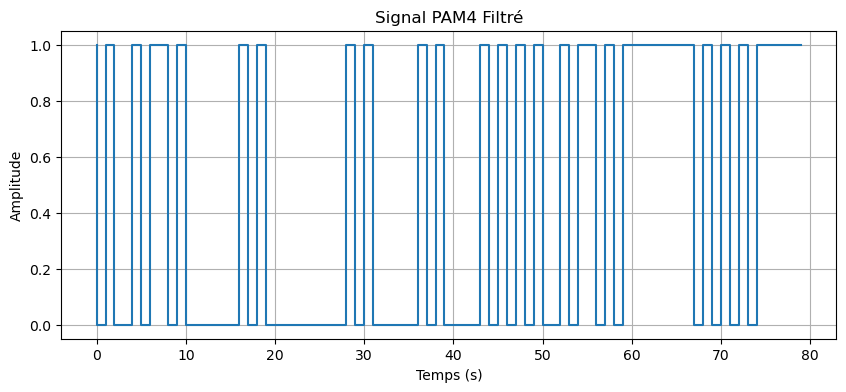

In [247]:
demap = pam4.demapping(detect)
demapGRAPH = PLT(demap).show((10, 4), np.arange(0,80,1), demap, 'steps-pre', 'Signal PAM4 Filtré', 'Temps (s)', 'Amplitude')

## Transmission d'un paquet ICMP avec modulation PAM4

les données associées à la trame au format hexadécimal sont :
 Ether / IP / ICMP 192.168.10.4 > 8.8.8.8 echo-request 0
mais c' est un objet de type Scapy : <class 'scapy.layers.l2.Ether'>.On peut le convertir en un objet de types bytes : <class 'bytes'>

En convertissant l objet bytes en une liste, on obtient une liste d entier : 
 [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 8, 0, 69, 0, 0, 28, 0, 1, 0, 0, 64, 1, 160, 36, 192, 168, 10, 4, 8, 8, 8, 8, 8, 0, 247, 255, 0, 0, 0, 0]
 et maintenant sous, la forme d'un array numpy : 
 [  0   1   2   3   4   5   6   7   8   9  10  11   8   0  69   0   0  28
   0   1   0   0  64   1 160  36 192 168  10   4   8   8   8   8   8   0
 247 255   0   0   0   0]

 les données associées à la trame au format binaire dans une liste de str : 
 ['0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0', '0', '0', '0', '0', '0', '1', '0', '0', '0', '0', '0', '0', '0', '1', '1', '0', '0', '0', '0', '0', '1', '0', '0', '0', '0', '0', '0',

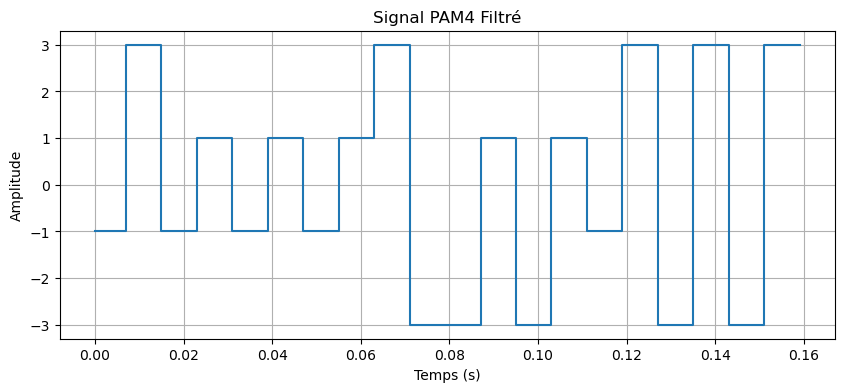

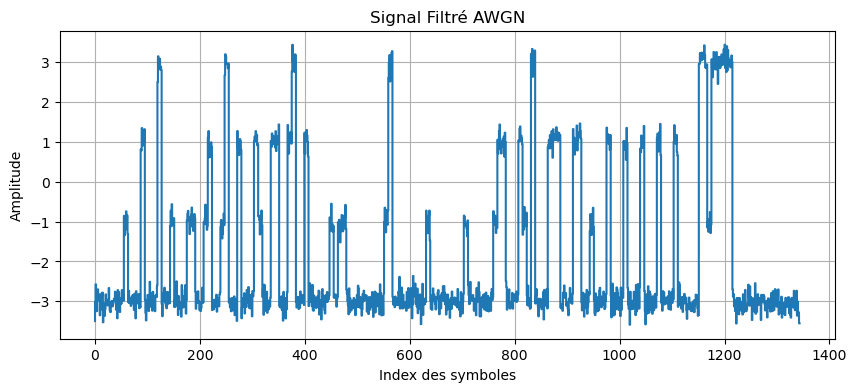

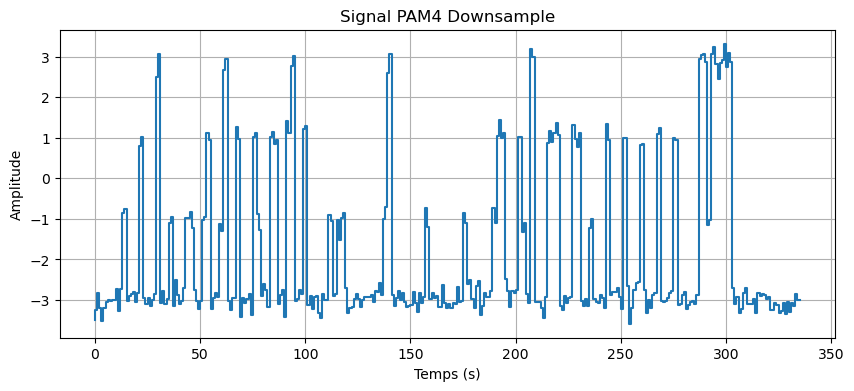

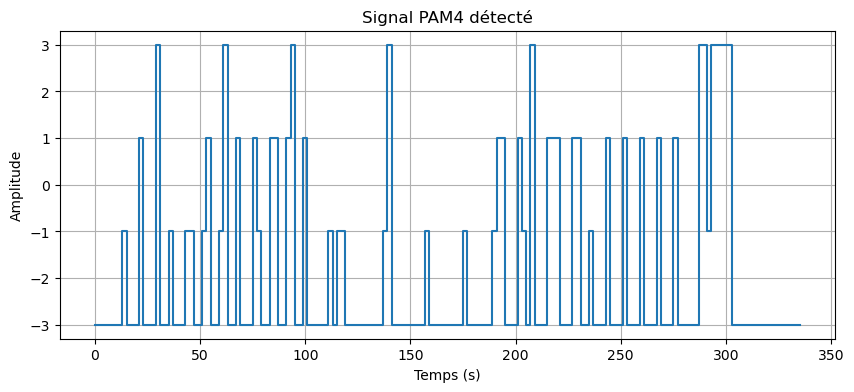

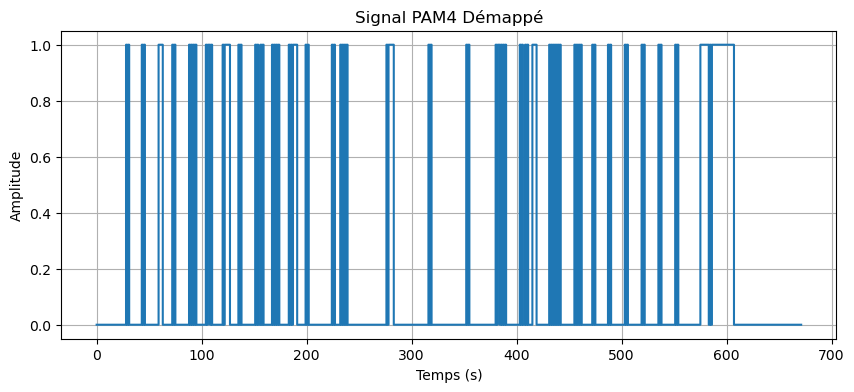

In [264]:

#################################################
####          Caracteristique                ####
#################################################

amplitudeICMP = 3
teICMP = 1e-3
feICMP = 1 / te

#################################################
####                Emetteur                 ####
#################################################

emetteur = Source.ICMP('00:01:02:03:04:05','06:07:08:09:0A:0B','8.8.8.8','192.168.10.4','request')

pam4ICMP = Modem('PAM', 4, emetteur)

symbs_modICMP = pam4ICMP.mapping(amplitudeICMP)

filtreRecICMP = pam4ICMP.filtre_MF(symbs_modICMP, 8, type='rectangular')

tempsICMP = np.arange(0, len(filtreRecICMP) * teICMP, teICMP)

graphICMP = PLT(filtreRec).show((10, 4), temps, filtreRec, 'steps-pre', 'Signal PAM4 Filtre', 'Temps (s)', 'Amplitude')

#################################################
####                Canal AWGN               ####
#################################################

signal_bruite_ICMP = Canal.awgn(filtreRecICMP, 0, 0.2)

lengthICMP = len(signal_bruite_ICMP)

# Creer x avec la meme longueur que y
x = np.arange(lengthICMP)

# Afficher le signal filtre AWGN
graphAWGN = PLT(signal_bruite_ICMP).show((10, 4), x, signal_bruite_ICMP, 'steps-pre', 'Signal Filtre AWGN', 'Index des symboles', 'Amplitude')

#################################################
####                Recepteur                ####
#################################################

downsampleICMP = pam4ICMP.downsample(signal_bruite_ICMP, 4)
graphDOWNSAMPLE_ICMP = PLT(downsampleICMP).show((10, 4), np.arange(len(downsampleICMP)), downsampleICMP, 'steps-pre', 'Signal PAM4 Downsample', 'Temps (s)', 'Amplitude')

detectICMP = pam4ICMP.detection(downsampleICMP)
detectGRAPHICMP = PLT(detectICMP).show((10, 4), np.arange(len(detectICMP)), detectICMP, 'steps-pre', 'Signal PAM4 detecte', 'Temps (s)', 'Amplitude')

demapICMP = pam4ICMP.demapping(detectICMP)
demapGRAPHICMP = PLT(demapICMP).show((10, 4), np.arange(len(demapICMP)), demapICMP, 'steps-pre', 'Signal PAM4 Demappe', 'Temps (s)', 'Amplitude')
